# Tasks
Solutions to Ian McLoughlin's Tasks assessment, by Fintan Hegarty (fintan.hegarty@gmail.com) 
***

## Task 1

#### Calculate the square root of 2 to 100 decimal places

In Example 1.1, we give a toy example. Approaches 1.2 and 1.4 fail due to insufficient computing power and precision. Approach 1.5 uses the digit-by-digit method and works. Testing 1.3 grabs the correct value for $\sqrt{2}$ from both the sympy module and a website. Comparison 1.6 checks that our answer from Approach 1.5 is correct. 

[Final Answer](#sqrt-FA) is the function to compute and print the square root of two to 100 decimal places, and its execution.


#### Example 1.1 Calculate the square root of 2 to ten decimal places 

We can calculate the square root of a number using Newton's method [<sup>1,</sup>](#sqrt-on-on)[<sup>2</sup>](#sqrt-on-tw).
To find the square root $z$ of a number $x$, we iterate using the following formula, until a satisfactory error bound is met:

$$ z_{i+1} = z_i-\frac{z_i^2-x}{2z_i} $$


In [1]:
def newton_sqrt(x):
    """
    A function to calculate the square root of a number x
    """
    # initial guess for sqrt z
    z=x/2
    # loop until satisfactory guess
    while abs(x - z*z) >0.0000000001 :
        # make a better guess
        z -= (z*z - x)/(2*z)
    # return sufficiently close approximation to sqrt x.
    # return ('{0:.10f}'.format(z))
    return (round(z,10))    

We test the function with some known values

In [2]:
# Test the function on 100
newton_sqrt(100)

10.0

In [3]:
# Test the function on 36
newton_sqrt(36)

6.0

In [4]:
# Test the function on 2
newton_sqrt(2)

1.4142135624

In [5]:
# Compare with numpy's sqrt function
# (This does necessitate an import, which is presumably fine.)
import numpy as np
numpy_sqrttwo_value = np.sqrt(2)
print("numpy's value is\n",'{0:.16f}'.format(numpy_sqrttwo_value))
print("newton_sqrt's value is\n", newton_sqrt(2))

if float(numpy_sqrttwo_value) == float(newton_sqrt(2)):
    print("They are the same.")
else:
    print("They are different.")
    

numpy's value is
 1.4142135623730951
newton_sqrt's value is
 1.4142135624
They are different.


This is not wholly surprising, and in any event, we're just comparing the printed values, as opposed to the actual value of the numbers we are describing. Using round instead:

In [6]:
# Compare with numpy's sqrt function using round
import numpy as np
numpy_sqrttwo_value_rounded = round(np.sqrt(2),10)
newton_sqrttwo_rounded = round(newton_sqrt(2),10)
print("numpy's value is\n", numpy_sqrttwo_value_rounded)
print("newton_sqrt's value is\n", round(newton_sqrt(2),10))

if numpy_sqrttwo_value_rounded==newton_sqrttwo_rounded:
    print("They are the same.")
else:
    print("They are different.")


numpy's value is
 1.4142135624
newton_sqrt's value is
 1.4142135624
They are the same.


#### Attempt 1.2

The method used in Example 1.1 will not work for the square root of 100, as the computer can't handle it. Therefore we try a version of the Babylonian method, borrowed from Wikipedia[<sup>3</sup>](#sqrt-on-th)

The formula here is

$$ a_{i+1} = \frac{a_i}{2}+\frac{1}{i} $$

In [7]:
def bab_sqrt(x):
    """
    A function to calculate the square root of a number x, hopefully more efficiently
    than the Newton method.
    """
    # initial guess for sqrt z
    a=1
    for i in range(1,100):
    # loop until satisfactory guess
        while abs(x - a*a) >0.000000000000001 :
        # make a better guess
            a = (a/2)+(1/a)
    # return sufficiently close approximation to sqrt x.
    return ('{0:.100f}'.format(a))
    # print(float("{0:.100f}".format(a)))
    # print(round(a,100))

In [8]:
bab_sqrt(2)

'1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000'

These digits appear to be inaccurate (visually - though we compare below so we have the method for when it is less obvious) according to the NASA website[<sup>4</sup>](#sqrt-on-fo) listing of the number (or the value from sympy, as given below), and equally problematically, a load of zeros are being uselessly printed instead of the actual digits. However, the method appears to be sufficiently fast that it actually runs, so that's a plus.

#### Testing 1.3
We grab the value of the square root of 2 from nasa.gov [<sup>4</sup>](#sqrt-on-fo) (and also using sqrt from sympy), for a comparison with the value we get, to confirm its accuracy.

In [9]:
# (This does necessitate imports for grabbing data and regexing, which is presumably fine,
#   as we are only using it for comparison, as opposed to calculating.)
import requests
import re
# Grab page content as string
page = requests.get("https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil").text

# Get rid of newlines
page = page.replace("\n","")

# Search for string beginning with 1.4 and grab the following 99 digits
# group(0) just takes the actual string as opposed to the object
real_sqrttwo_value = re.search("1.4\d{99}", page).group(0)
print("The correct value of square root two to 100 places is\n", real_sqrttwo_value)

The correct value of square root two to 100 places is
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [10]:
# Again, this import is just for comparison.
from sympy import sqrt
sympy_sqrttwo_value=sqrt(2).evalf(101)
print(sympy_sqrttwo_value)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [11]:
if round(float(bab_sqrt(2)),100)==round(float(real_sqrttwo_value),100):
    print ("They are the same.")
else:
    print ("They are different.")
    
if round(float(sympy_sqrttwo_value),100)==round(float(real_sqrttwo_value),100):
    print ("They are the same.")
else:
    print ("They are different.")
    

They are different.
They are the same.


#### Approach 1.4

The decimal precision appears problematic. Perhaps we can calculate the same number to some power of 10, to give the correct digits, with only the decimal point misplaced?
If $n=\sqrt{2}$, then $10n=\sqrt{100\times 2}$, so to calculate $n$ we can calculate $\sqrt{100\times 2}$ and move the decimal point one place to the right.

In [12]:
n=newton_sqrt(2)
print('n is ',n)
f=newton_sqrt(100*2)
print('n is ',f,' with the decimal to be moved one space to the right.')

n is  1.4142135624
n is  14.1421356237  with the decimal to be moved one space to the right.


Let $n=\sqrt{2}$. Let $f$ (the 'fake' evaluation, whose decimal point we will move) be $10^{100}$ times bigger than $\sqrt{2}$ (so the decimal point will be 100 places to the left of where we want it). So the number under the square root sign will be $ 10^{200}$ times bigger than $2$; i.e., $f=\sqrt{2\times10^{200}}$, and then we will move the decimal point 100 places to the right.


In [13]:
f = 2*10**(4) 
answer = format(newton_sqrt(f), ',.100f') 
print(answer)

141.4213562372999888339109020307660102844238281250000000000000000000000000000000000000000000000000000000


This appears to be on the right track, but the newton_sqrt method is struggling for bigger powers, so a different approach to newton_sqrt may be required.

#### Approach 1.5
We will try the digit-by-digit approach of calculating the square root, as detailed, for example on Wikipedia.[<sup>5</sup>](#sqrt-on-fi)
Though the idea used here is largely the same as there, we can take some short-cuts; e.g., we know we start with 2, and that all we will add to the right-hand side will be pairs of zeros.

In [14]:
# Initialise values
# I've used c and r where only c is mentioned on wikipedia, but they're just different stages of the same thing.
c=2; x=0; y=0; r=0; A=0; p=0;

# Handling the first iteration separately makes the loop less complicated to write
while (x+1)*(20*p+(x+1))<=2:
    x=x+1
y=x*(20*p+x)
r=c-y
A=x

# This is simpler than the example on the wiki, because we know we are only appending
# 00s, so no need for dividing up part of a string and grabbing two pieces, etc.
# We do end up with a number 10^100 times bigger than what we want, because we've
# ignored the decimals, but I'll stick that in afterwards.
for i in range(1,101):
    c=100*r; x=0; y=0; p=A;
    while (x+1)*((20*p)+(x+1))<=c:
        x=x+1
    y=x*(20*p+x)
    r=c-y
    # This serves the purpose of appending x to A
    A=A*10+x
print(A)

14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [15]:
Ans=format(A/(10**100), ',.100f')
print(Ans)

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


I guess we'll have to preserve it as a string, and just insert the decimal point.

In [16]:
# Sticking in the decimal
stringA=str(A)
Ans=stringA[:1] + '.' + stringA[1:]
print(Ans)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


#### Comparison 1.6
We compare the string with actual values acquired from sympy and nasa website to confirm accuracy. (Also with the incorrect (excessively rounded) value from numpy as a control. 

In [17]:
# Testing by comparing strings
print(Ans==str(sympy_sqrttwo_value))
print(Ans==str(numpy_sqrttwo_value))
print(Ans==str(real_sqrttwo_value))

True
False
True


#### Answer 1.7

In [18]:
print("The square root of 2, to 100 decimal places is\n",Ans)

The square root of 2, to 100 decimal places is
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727



#### <span id="sqrt-FA">FINAL ANSWER TO TASK 1:</span>

In [19]:
def sqrt2():
    c=2; x=0; y=0; r=0; A=0; p=0;
    while (x+1)*(20*p+(x+1))<=2:
        x=x+1
    y=x*(20*p+x)
    r=c-y
    A=x
    for i in range(1,101):
        c=100*r; x=0; y=0; p=A;
        while (x+1)*((20*p)+(x+1))<=c:
            x=x+1
        y=x*(20*p+x)
        r=c-y
        A=A*10+x
        stringA=str(A)
        Ans=stringA[:1] + '.' + stringA[1:]
    print(Ans)

In [20]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


***

## Task 2
| |A|B|C|D|Total
| --- | --- | --- | --- | --- | --- |
| White collar|90|60|104|95|349 |
| Blue collar|30|50|51|20|151|
| No collar|30|40|45|35|150|
| Total|150|150|200|150|650|

#### Use scipy.stats  [<sup>8</sup>](#chi-tw-th) to verify the $\chi^{2}$ value [<sup>6</sup>](#chi-tw-on) of this table is 24.6, and calculate the associated $p$ value. [<sup>7</sup>](#chi-tw-tw)
    


In [21]:
import numpy as np
import pandas as pd
import scipy.stats as st

# First we create the data frame; there's no need to include the totals, as these will
# be calculated by python later
deets={'A': [90,30,30], 'B': [60,50,40], 'C': [104,51,45], 'D': [95,20,35]}
df = pd.DataFrame(data=deets)
df.index=["White collar", "Blue collar", "No collar"]
print(df,'\n')

# let scipy.stats do all the hard work, and assign the values
chi2, pv, dof, exp  = st.chi2_contingency(df)
print('The test statistic value is', chi2, '. \n')
print('The p value value is', pv, '. \n')
print('There are', dof, 'degrees of freedom. \n')
print('The expected value matrix if neighbourhood and collar were independent would be\n', exp, '.\n')

               A   B    C   D
White collar  90  60  104  95
Blue collar   30  50   51  20
No collar     30  40   45  35 

The test statistic value is 24.5712028585826 . 

The p value value is 0.0004098425861096696 . 

There are 6 degrees of freedom. 

The expected value matrix if neighbourhood and collar were independent would be
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]] .



The p value here (0.00041) is very small, certainly smaller than any alpha level/threshold of significance we are likely to be asked to test for, so we may reject the null hypothesis; i.e., we cannot say that the collar colour and region are independent.

***
# Task 3

#### Describe and contrast Excel's STDEV.P and STDEV.S. Use numpy to perform a simulation demonstrating that STDEV.S is a better estimate for the standard deviation of a population when performed on a sample. 

The formula for the standard deviation [<sup>9</sup>](#std-th-on) of a population is
$$\sigma=\sqrt{\frac{\sum_{i=1}^N(x_i-\mu)^2}{N}},$$
where $N$ is the size of the population and $\mu$ is the mean of the population.

This is calculated in Microsoft Excel [<sup>10</sup>](#std-th-tw) with the function STDEV.P.

Often, we do not have a full population, and only have a sample to calculate with. Intuitively, the expected values of the variance and deviation of a sample are greater than those of the population itself. (E.g., selecting 1000 random points from a normal distribution is likely to give a more accurate idea of the spread of the population's data than a sample of just 10 points, where adding one or two extra points could have a large effect on the expected variance and deviation of the sample. As the size of the sample approaches the size of the population, the variability of the values tends to the settle down.)

To reduce the value of the formula above, we increase the value of the denominator. 
This is a somewhat intuitive justification for the amended formula. The "intuitive"[<sup>11</sup>](#std-th-th) justification for changing the value of the denominator from $n$ to $n-1$ seems to really be either empirical or algebraic. Empirical support seems to be the latter part of the question, and an algebraic proof seems beyond the scope of the module, so I will refrain from copy and pasting it from, for example, Wikipedia's entry on Bessel's correction[<sup>12</sup>](#std-th-fo). 

The formula for the standard deviation for a sample (note the denominator change - the other variables are simply statistical analogues of the sample to the population parameters).

$$s=\sqrt{\frac{\sum_{i=1}^N(x_i-\bar{x})^2}{N-1}}.$$

This is calculated in Microsoft Excel using STDEV.S.

These formulas are not unique to Excel; I will use the LibreOffice functions, since I am not on a Windows machine, but they are identical - even the names STDEV.P[<sup>13</sup>](#std-th-fi) and STDEV.S are the same.




Before using python to run the simulations, we shall first run a TOY EXAMPLE with LibreOffice itself. 

Using =NORMINV(RAND(),50,10) to generate 1000 random points on a normal distribution about mean 50, with standard deviation 10, we get the following parameters:
$\mu=49.66256017$ and $\sigma=10.093648$

Next we run ten tests, selecting samples of size 100 to see if using STDEV.S is more accurate than STDEV.P (i.e., closer to the real $\sigma$. I will embolden the more accurate (i.e. the smaller error).

| | STDEV.P | STDEV.P error | STDEV.S | STDEV.S error 
| --- | --- | --- | --- | --- |
| Sample 1 | 9.3046374272 |	0.7047273716 | 10.6078393083 | **0.5984745095** |
| Sample 2 | 10.1415558481 | **0.1321910493** | 10.1926471329 | 0.1832823341 |
| Sample 3 | 9.7361852347 | 0.2731795642 | 9.7852343372 | **0.2241304616** |
| Sample 4 | 9.5072365378 | 0.502128261 | 9.5551322391 | **0.4542325597** |
| Sample 5 | 9.9778339813 | 0.0315308175 | 10.0281004656 | **0.0187356668** |
| Sample 6 | 10.6518134966 | **0.6424486978** | 10.7054753651 | 0.6961105663 |
| Sample 7 | 10.5777728298 | **0.568408031** | 10.6310616952 | 0.6216968963 |
| Sample 8 | 10.0698784086 | **0.0605136098** | 10.1206085957 | 0.1112437969 |
| Sample 9 | 9.8311596107 | 0.1782051881 | 9.8806871766 | **0.1286776222** |
| Sample 10 | 9.75063108 | 0.2587337188 | 9.7997529581 | **0.2096118407** |

STDEV.S appears to be slightly more accurate, but nothing definitive. This is because the sample size is very large, so the difference between $n-1$ and $n$ verges on negligible, especially given that the square root thereof is being taken, so any difference can be lost in rounding error.

Let us try with smaller samples; here the size of the samples is 30.

| | STDEV.P | STDEV.P error | STDEV.S | STDEV.S error
| --- | --- | --- | --- | --- |
| Sample 11 | 9.7154559039 | 0.3565769483 | 9.8815441042 | **0.190488748** | 
| Sample 12 | 11.1611084634 | **1.0890756113** | 11.3519104635 | 1.2798776114 | 
| Sample 13 | 8.193434327 | 1.8785985252 | 8.3335031796 | **1.7385296725** | 
| Sample 14 | 8.5661010318 | 1.5059318204 | 8.7125407169 | **1.3594921352** | 
| Sample 15 | 10.0946507718 | **0.0226179197** | 10.2672214052 | 0.1951885531 | 
| Sample 16 | 8.6089441108 | 1.4630887413 | 8.7561162094 | **1.3159166428** | 
| Sample 17 | 10.7962155689 | **0.7241827168** | 10.9807796317 | 0.9087467796 | 
| Sample 18 | 11.4288570799 | **1.3568242278** | 11.624236311 | 1.5522034589 | 
| Sample 19 | 8.4831631569 | 1.5888696952 | 8.6281849979 | **1.4438478542** | 
| Sample 20 | 9.5078689204 | 0.5641639317 | 9.6704083682 | **0.4016244839** | 

Again, it appears the STDEV.S is almost imperceptibly better. Let us reduce the sample size to 20.
Population standard deviation here is 9.8009880294

| | STDEV.P | STDEV.P error | STDEV.S | STDEV.S error | 
| --- | --- | --- | --- | --- |
| Sample 21 | 8.9543507265 | 0.855529568 | 9.1869700024	| **0.6229102921** | 
| Sample 22 | 7.173992363 | 2.6358879315 | 7.3603608624 | **2.449519432** | 
| Sample 23 | 9.1693162757 | 0.6405640188 | 9.4075200023 | **0.4023602922** | 
| Sample 24 | 6.6062972858 | 3.2035830087 | 6.7779180026 | **3.0319622918** | 
| Sample 25 | 9.7734860099 | **0.0363942846** | 10.0273850705 | 0.2175047761 | 
| Sample 26 | 7.5169705153 | 2.2929097792 | 7.712249022 | **2.0976312725** | 
| Sample 27 | 7.2992629442 | 2.5106173503 | 7.4888857669 | **2.3209945275** | 
| Sample 28 | 8.5553287119 | 1.2545515826 | 8.7775820534 | **1.0322982411** | 
| Sample 29 | 10.2223885418 | **0.4125082473** | 10.4879493505 | 0.678069056 | 
| Sample 30 | 10.2358938189 | **0.4260135245** | 10.5018054725 | 0.691925178 | 

It is a little clearer here that STDEV.S is an improvement over STDEV.P, but it's not as clear-cut as I would like it to be before moving on, so let us try sample sizes of 15, and then hopefully we can move on from this increasingly inaccurately named toy example. Population standard deviation here 9.853738619. (These values are slightly different because the random data points regenerate each turn).

| | STDEV.P | STDEV.P error | STDEV.S | STDEV.S error | 
| --- | --- | --- | --- | --- |
| Sample 31 | 7.49088399 | 2.3628546294 | 7.7538015758 | **2.0999370436** |
| Sample 32 | 7.2096096068 | 2.6441290126 | 7.4626549289 | **2.3910836904** | 
| Sample 33 | 5.6865952012 | 4.1671434182 | 5.8861852474 | **3.967553372** | 
| Sample 34 | 6.9213163568 | 2.9324222625 | 7.1642430647 | **2.6894955546** | 
| Sample 35 | 5.8503851354 | 4.003353484 | 6.0557239362 | **3.7980146831** | 
| Sample 36 | 9.1134699117 | 0.7402687077 | 9.4333375682 | **0.4204010511** | 
| Sample 37| 10.6467176607 | **0.7929790413** | 11.0203997665 | 1.1666611471 | 
| Sample 38 | 9.5626527735 | 0.2910858458 | 9.8982860024 | **0.0445473831** | 
| Sample 39 |4.9724232579 | 4.8813153614 | 5.1469470551 | **4.7067915642** | 
| Sample 40 | 11.9735258233 | **2.119787204** | 12.3937766919 | 2.5400380725 | 

This seems illustrative that STDEV.S is an improvement over STDEV.P for sufficiently small samples.
A quote from Press et al.[<sup>14</sup>](#std-th-si) feels appropriate at this juncture...

*"...if the difference between $n$ and $n-1$ ever matters to you, then you are probably up to no good anyway – e.g. trying to substantiate a questionable hypothesis with marginal data..."*




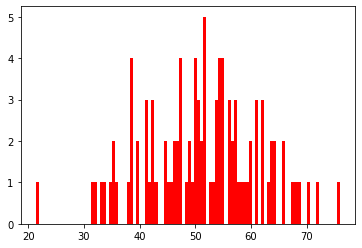

10.138649842786648


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Two functions for standard deviation

# stddevS for a sample
def stddevS(x):
    samplestd=np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1));
    return samplestd

# stddevP for population
def stddevP(x):
    popstd=np.sqrt(np.sum((x-np.mean(x))**2)/len(x));
    return popstd

# So, as in the toy example previously, simply put, we want to
# 1. Create a population
# 2. Create some samples
# 3. Check whether the sample standard deviation formula or the
# population standard deviation formula for the sample gives an answer closer
# to the actual population standard deviation.

# Possible further: Investigate effect of population and sample sizes. As sample size approaches population
# size, expect difference between stddevP and stddevS errors to disappear.
# May be worth investigating the effect of sample size, and of varying standard deviations.

plt.clf()
# 1 Create population 
x = np.random.normal(50, 10, 100)
plt.hist(x,100,color='red')
plt.show()

sigma = stddevP(x)
print(sigma)


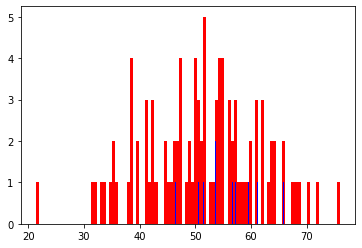

Difference between std dev of population and stddevP of sample is
 4.738029193630387
Difference between std dev of population and stddevS of sample is
 4.445895832829684


In [23]:
# 2.
# Select a random sample from the population we've just created 
plt.clf()
sample = np.random.choice(x, 10)
plt.hist(x,100,color='red')
plt.hist(sample,100,color='blue')
plt.show()

# 3. 
# Check which is closer.
print('Difference between std dev of population and stddevP of sample is\n', abs(sigma-stddevP(sample)))
print('Difference between std dev of population and stddevS of sample is\n', abs(sigma-stddevS(sample)))


As with the toy example, repeated runs of this stddevP vs stddevS are disappointingly unclear. 

I will run a larger sample, varying population size, sample size (as a percentage of population size), and standard deviation of population size (as a percentage).

In [25]:
# Toy function to check the animation

import matplotlib.pyplot as plt
import random
from operator import add
import numpy as np
from celluloid import Camera
from IPython.display import Video

# This clears the plot data picked up previously
plt.clf()
fig = plt.figure(figsize=(6,3))
camera=Camera(fig)

# L is a list with which we shall count the "wins" for stddevP vs stddevS.
L=[0,0]

# This toy function randomly adds 1 to either the left or right of L. 
# It is for testing
# purposes for the script; we will replace it with the loop running over the various
# populations etc. in due course
def rando():
    k=random.randint(0,1)
    global L
    L=list(map(add,[k,1-k],L))
    return L

# This function plots each new value of L
def animate():
    rando()
    graph=plt.bar([0,1],L)    
    camera.snap()

for i in range(100):    
    animate()

animation = camera.animate()
animation.save("testvid.mp4")

Video("testvid.mp4")

The next block is of raw type so you don't have to wait for it to run. It takes about a minute if you wish to convert to code and run it for 1 iteration (as currently coded). 

This above example is just to show the code running with 1 iteration at each step. The video below is of 5 iterations, and is included in the github repository. A longer video with 50 iterations at each step, which takes about a day to run and half an hour to view, is available at https://youtu.be/DnhmeG6Cyb4 if you want to watch half an hour of the same thing.

The script runs over a range of population sizes, population standard deviations, and sample sizes. It creates a population with a normal distribution (and mean 50, which shouldn't make any difference), and generates a random sample. If the sample standard deviation formula answer is closer than the population standard deviation formula answer to the standard deviation of the population, 1 is added to stddevS, and otherwise 1 is added to stddevP.

These simulations suggest that as a whole, the "n-1" formula is a better approximation than the "n" formula, but not in every situation by a long shot.

In [26]:
from IPython.display import Video

Video("smallout.mp4")

# Task 4

####  Use scikitlearn to apply k-means clustering to Fisher's Iris data set. Explain how to use it to make predictions of species of iris.

Plan: import libraries and data set, plot the graph, use k-means clustering to split the data into three clusters (representing each type of iris). (Four variables, so for 2-dimensional arrays we'll need six plots. Might also try a three-dimensional array.) Add extra points and see how the prediction works.

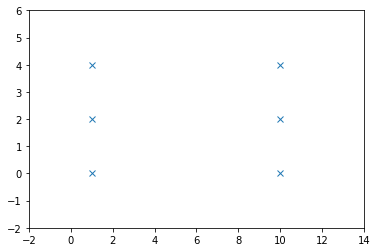

In [31]:
# Numerical arrays.
import numpy as np
# Machine learning - KMeans.
import sklearn.cluster as skcl
# Plotting.
import matplotlib.pyplot as plt

# Data set.
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
# Plot the data set.
plt.plot(X[:,0], X[:,1], 'x')
# Set reasonable limits.
plt.xlim([-2,14])
plt.ylim([-2,6])
plt.show()

In [32]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(X)
# See the labels of the points.
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

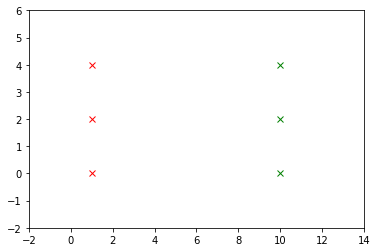

In [33]:
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
# Set reasonable limits.
plt.xlim([-2,14])
plt.ylim([-2,6])
plt.show()

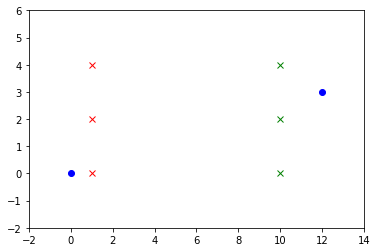

In [34]:
# Predict the cluster for two points.
newvals = np.array([[0, 0], [12, 3]])
predictions = kmeans.predict(newvals)
predictions# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(newvals[:,0], newvals[:,1], 'bo')
# Set reasonable limits.
plt.xlim([-2,14])
plt.ylim([-2,6])
plt.show()

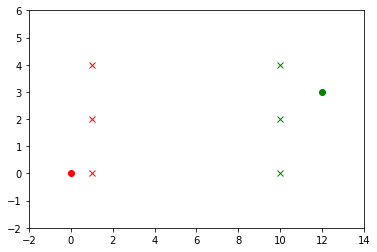

In [35]:
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'ro')
# Set reasonable limits.
plt.xlim([-2,14])
plt.ylim([-2,6])
plt.show()

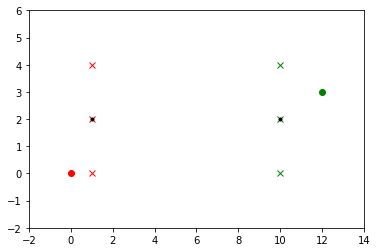

In [36]:
cent = kmeans.cluster_centers_
cent
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'ro')
plt.plot(cent[:,0], cent[:,1], 'k.')
# Set reasonable limits.
plt.xlim([-2,14])
plt.ylim([-2,6])
plt.show()

In [37]:
# Data set.


# Two centre points.
c1 = np.array([1.0,  2.0])
c2 = np.array([5.0, 12.0])

# Create points randomly around the centre points.
c1x = np.random.normal(c1[0], 2.0, 10)
c1y = np.random.normal(c1[1], 2.0, 10)
c1p = np.vstack([c1x, c1y]).T
c2x = np.random.normal(c2[0], 2.0, 10)
c2y = np.random.normal(c2[1], 2.0, 10)
c2p = np.vstack([c2x, c2y]).T

# Merge the two lists of values.
myX = np.concatenate([c1p, c2p])
# Shuffle the points.
np.random.shuffle(myX)

myX

array([[ 2.57822566,  6.5096078 ],
       [-0.04377502,  3.37568244],
       [ 3.90836909, 11.54836616],
       [ 0.6405863 ,  8.60256938],
       [ 0.61607938,  2.47348621],
       [ 4.54943713, 10.80758033],
       [ 5.05043697,  9.37475085],
       [ 2.81979389, 11.4576529 ],
       [-0.21587614, -0.34734616],
       [ 3.38258413, 10.81422895],
       [ 7.96857341, 12.26903669],
       [ 4.89925613, 15.7212411 ],
       [ 5.41735222,  9.24283335],
       [ 6.18603196, 11.85260916],
       [ 1.85356045,  1.3328166 ],
       [ 4.81345023, -0.55222076],
       [ 2.64479688,  4.28759802],
       [ 0.61033651,  1.52056513],
       [ 2.58273156, -2.27956511],
       [ 1.24248566,  0.68497444]])

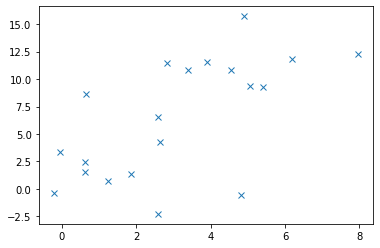

In [38]:
# Plot the data set.
plt.plot(myX[:,0], myX[:,1], 'x')
plt.show()

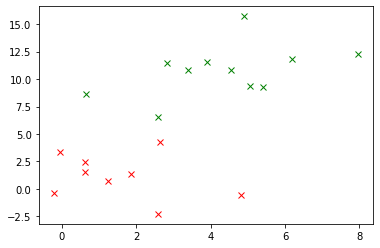

In [39]:
# Perform kmeans fitting.
mykmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(myX)
# Plot the data set.
plt.plot(myX[mykmeans.labels_ == 0][:,0], myX[mykmeans.labels_ == 0][:,1], 'gx')
plt.plot(myX[mykmeans.labels_ == 1][:,0], myX[mykmeans.labels_ == 1][:,1], 'rx')
plt.show()

In [40]:
# Create new dummy points for classification.
# mynewvals = np.array([[0, 0], [6, 10]])
myxvals = np.linspace(-1.0, 7.0, 10)
myyvals = np.linspace(-1.0, 15.0, 10)
mynewvals = np.vstack([myxvals, myyvals]).T
mynewvals

array([[-1.        , -1.        ],
       [-0.11111111,  0.77777778],
       [ 0.77777778,  2.55555556],
       [ 1.66666667,  4.33333333],
       [ 2.55555556,  6.11111111],
       [ 3.44444444,  7.88888889],
       [ 4.33333333,  9.66666667],
       [ 5.22222222, 11.44444444],
       [ 6.11111111, 13.22222222],
       [ 7.        , 15.        ]])

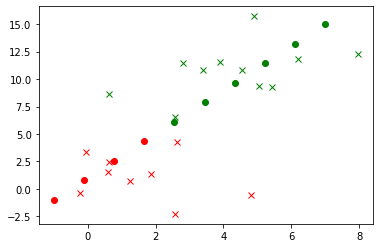

In [41]:
# Predict the cluster for two points.
mypredictions = mykmeans.predict(mynewvals)
mypredictions
# Plot the data set.
plt.plot(myX[mykmeans.labels_ == 0][:,0], myX[mykmeans.labels_ == 0][:,1], 'gx')
plt.plot(myX[mykmeans.labels_ == 1][:,0], myX[mykmeans.labels_ == 1][:,1], 'rx')
plt.plot(mynewvals[mypredictions == 0][:,0], mynewvals[mypredictions == 0][:,1], 'go')
plt.plot(mynewvals[mypredictions == 1][:,0], mynewvals[mypredictions == 1][:,1], 'ro')
plt.show()


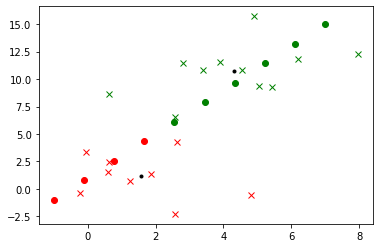

In [42]:
# The centres of clusters.
mycent = mykmeans.cluster_centers_
mycent
# Plot the data set.
plt.plot(myX[mykmeans.labels_ == 0][:,0], myX[mykmeans.labels_ == 0][:,1], 'gx')
plt.plot(myX[mykmeans.labels_ == 1][:,0], myX[mykmeans.labels_ == 1][:,1], 'rx')
plt.plot(mynewvals[mypredictions == 0][:,0], mynewvals[mypredictions == 0][:,1], 'go')
plt.plot(mynewvals[mypredictions == 1][:,0], mynewvals[mypredictions == 1][:,1], 'ro')
plt.plot(mycent[:,0], mycent[:,1], 'k.')
plt.show()

In [1]:
# For numerical arrays
import numpy as np
# For k-clustering 
from sklearn.cluster import KMeans
# For plots
import matplotlib.pyplot as plt
# For databases
import pandas as pd
# Import dataset

# Read in the data
Iris = pd.read_csv('Iris.csv')

Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


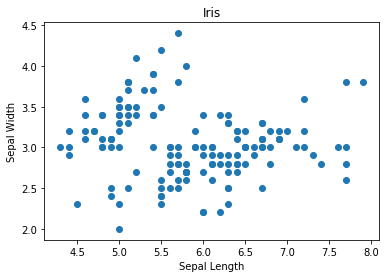

Max sepal length is  7.9
Max sepal width is  4.4
Max petal length is  6.9
Max petal width is  2.5


In [13]:
x1 = np.array(Iris['SepalLengthCm'])
x2 = np.array(Iris['SepalWidthCm'])
x3 = np.array(Iris['PetalLengthCm'])
x4 = np.array(Iris['PetalWidthCm'])

plt.plot()
plt.title('Iris')
plt.scatter(x1, x2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

print('Max sepal length is ',max(x1)) # =7.9, to confirm graph labels are accurate
print('Max sepal width is ',max(x2)) # =4.4 
print('Max petal length is ',max(x3)) # =6.9
print('Max petal width is ',max(x4)) # =2.5

## References
<span id="sqrt-on-on"> 1. A Tour of Go: Loops and Functions https://tour.golang.org/flowcontrol/8</span>

<span id="sqrt-on-tw"> 2. Newton's method: https://en.wikipedia.org/wiki/Newton%27s_method</span>

<span id="sqrt-on-th"> 3. Babylonian method: https://en.wikipedia.org/wiki/Square_root_of_2</span>

<span id="sqrt-on-fo"> 4. Accurate square root of 2: https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil</span>

<span id="sqrt-on-fi"> 5. Digit-by-digit method of calculating square root: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation</span>

<span id="chi-tw-on"> 6. Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test</span>

<span id="chi-tw-tw"> 7. p-value: https://www.simplypsychology.org/p-value.html</span>

<span id="chi-tw-th"> 8. scipy.stats manual: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html</span>

<span id="std-th-on"> 9. Standard deviation https://en.wikipedia.org/wiki/Standard_deviation</span>

<span id="std-th-tw"> 10. STDEV Microsoft https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23</span>

<span id="std-th-th"> 11. StackExchange's attempt at intuitive explanation https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation

<span id="std-th-fo"> 12. Bessel's correction https://en.wikipedia.org/wiki/Bessel%27s_correction</span>

<span id="std-th-fi"> 13. LibreOffice functions https://help.libreoffice.org/Calc/Statistical_Functions_Part_Five#STDEV.P</span>

<span id="std-th-si"> 14. Quote http://iate.oac.uncor.edu/~mario/materia/nr/numrec/f14-1.pdf</span>
